# **Práctica Final por Equipo, Propedéutico de Estadística Verano 2020**
____________________________________________________________________________________________________________

### **Análisis descriptivo de los Taxis Verdes de la Ciudad de Nueva York durante 2019 en R, utilizando la paquetería de tidyverse, R base, FinCal y PropCIs y las librerías de readr, ggplot2, modeest, stats, nortest**

### **Profr.** Erick Palacios Moreno
### **Equipo 8**
### **Integrantes**
#### Carlos Garza Bracamontes (carlosgarza-3)
#### Enrique Ortiz Casillas (EnriqueOrtiz27)
#### Octavio Fuentes Ortiz (ofuentesitam)
#### **Fecha de Entrega:** 19/07/2020
____________________________________________________________________________________________________________

**La base de datos de los Taxis Verdes, la obtuvimos de la página del Gobierno de la Ciudad de Nueva York.**

**La base de datos se puede consultar en:**  *[Green Taxi Trip Records NYC](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)* **.**

**El diccionario de datos se puede consultar en:**  *[Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf)* **.**
____________________________________________________________________________________________________________

**Paqueterías utilizadas:**

- *[tidyverse](https://www.tidyverse.org/)*.

In [1]:
#install.packages("tidyverse")
library(tidyverse) #ggplot2,tibble,tidyr,readr,purrr,dplyr,stringr,forcats

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.2     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'stringr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



- *[modeest](https://www.rdocumentation.org/packages/modeest/versions/2.4.0#:~:text=modeest%3A%20Estimation%20of%20the%20mode,modes%20of%20usual%20probability%20distributions.)*.

In [2]:
#install.packages("modeest")
library(modeest)

Warning message:
"package 'modeest' was built under R version 3.6.3"
Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr



- *[FinCal](https://cran.r-project.org/web/packages/FinCal/FinCal.pdf)*.

In [3]:
#install.packages("FinCal")
library(FinCal)

Warning message:
"package 'FinCal' was built under R version 3.6.3"


- *[R base](https://rstudio.com/wp-content/uploads/2016/05/base-r.pdf)*.

- *[PropCIs](https://cran.r-project.org/web/packages/PropCIs/PropCIs.pdf)*.

In [4]:
#install.packages("PropCIs")
library(PropCIs)

**Librerías utilizadas:**

- *[readr](https://readr.tidyverse.org/)*.

In [5]:
library(readr)

- *[ggplot2](https://ggplot2.tidyverse.org/)*.

In [6]:
library(ggplot2)

- *[stats](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/stats-package.html)*.

In [7]:
library(stats)

- *[nortest](https://cran.r-project.org/web/packages/nortest/index.html)*.

In [8]:
#install.packages("nortest")
library(nortest)

____________________________________________________________________________________________________________

Establecemos el directorio donde tenemos las BBDD del **primer cuatrimestre**:

In [9]:
setwd("C:/Users/ofuentes/Desktop/green_taxi_records")

____________________________________________________________________________________________________________

#### ___LIMPIEZA DE DATOS___ 

Antes de empezar con el análisis descriptivo de nuestros datos es necesario saber con qué datos estamos trabajando y sobretodo, si éstos están limpios. El procedimiento y explicación de nuestra limpieza de datos, se encuentra en el repositorio de nuestra Práctica Final: [data_exploration.ipynb](https://github.com/prope-2020-gh-classroom/practica-final-por-equipos-verano-2020-itam-carlosgarza-3/blob/master/tercer_cuatrimestre/data_exploration.ipynb).

Nuestras funciones de limpieza y adición de columnas, se resumen en la función **"data_pipeline"**:

In [10]:
clean_dataframe <- function(data_frame) {
    #function to remove unnecessary cols in r dataframe and na's
    data_frame$VendorID <- NULL
    data_frame$store_and_fwd_flag <- NULL
    data_frame$PULocationID <- NULL
    data_frame$DOLocationID <- NULL
    data_frame$RatecodeID <- NULL
    data_frame$ehail_fee <- NULL
    data_frame$improvement_surcharge <- NULL 
    data_frame$tolls_amount <- NULL 
    data_frame$mta_tax <- NULL 
    data_frame$extra <- NULL 
    data_frame$congestion_surcharge <- NULL
    return(data_frame[complete.cases(data_frame),])
}


add_columns <- function(data_frame, month) {
    #function to add 2 columns to data frame to improve analysis
    #first we add trip duration in hours
    data_frame$lpep_dropoff_datetime <- as.POSIXct(data_frame$lpep_dropoff_datetime,
                                      format='%Y-%m-%d %H:%M:%S')
    data_frame$lpep_pickup_datetime <- as.POSIXct(data_frame$lpep_pickup_datetime,
                                      format='%Y-%m-%d %H:%M:%S')
    data_frame$trip_duration <- as.numeric(difftime(data_frame[,2], data_frame[,1], units="hours"))
    
    #then we add tip percentage
    data_frame$tip_pct <- data_frame$tip_amount / data_frame$total_amount
    data_frame$month <- month
    data_frame <- data_frame[data_frame$trip_duration<5,]
    data_frame <- data_frame[data_frame$total_amount > 0,]
    data_frame <- data_frame[data_frame$fare_amount > 0,]
    data_frame <- data_frame[data_frame$tip_amount > 0,]
    data_frame <- data_frame[data_frame$trip_duration >0,]
    data_frame <- data_frame[data_frame$trip_distance >0,]
    return(data_frame)
}

In [11]:
data_pipeline <- function(csv, month){
    #function to include all cleaning and transformation functions 
    data <- read.csv(csv)
    data <- clean_dataframe(data)
    data <- add_columns(data, month)
    return(data)
}

Aplicamos **data_pipeline** para el **primer cuatrimestre:**

In [12]:
enero_data <- data_pipeline('green_tripdata_2019-01.csv', 'Enero')
febrero_data <- data_pipeline('green_tripdata_2019-02.csv', 'Febrero')
marzo_data <- data_pipeline('green_tripdata_2019-03.csv', 'Marzo')
abril_data <- data_pipeline('green_tripdata_2019-04.csv', 'Abril')

Juntamos nuestro **primer cuatrimestre** y lo exportamos a un archivo .csv (para posteriormente leerlo):

In [13]:
cuatrimestre1_data <- bind_rows(enero_data, febrero_data, marzo_data, abril_data)
write.csv(x = cuatrimestre1_data, file = "primer_cuatri.csv")
primer_cuatrimestre <- read_csv('primer_cuatri.csv')
# Colocamos nombre a las columnas:
colnames(primer_cuatrimestre) <- c("X1","Pick_up","Dropp_off","Passengers","Trip_distance","Fare_amount",
                                   "Tip_amount", "Total_amount","Payment_type", "Trip_type", "Trip_duration",
                                   "Tip_pct", "Month")

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_character(),
  lpep_pickup_datetime = col_datetime(format = ""),
  lpep_dropoff_datetime = col_datetime(format = ""),
  passenger_count = col_double(),
  trip_distance = col_double(),
  fare_amount = col_double(),
  tip_amount = col_double(),
  total_amount = col_double(),
  payment_type = col_double(),
  trip_type = col_double(),
  trip_duration = col_double(),
  tip_pct = col_double(),
  month = col_character()
)



Lo anterior, nos simplifica la lectura de los datos, pues en vez de tener 12 archivos .csv, tendremos 3 (uno para cada cuatrimestre). Además, resulta conveniente lo que hicimos, pues como última columna, tenemos el mes correspondiente; esto nos servirá para fácilmente trabajar a nivel cuatrimestre o a nivel mes.

Vemos la estructura de la base de datos ya limpia:

In [14]:
str(primer_cuatrimestre)

tibble [802,074 x 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1           : chr [1:802074] "...1" "...2" "...3" "...4" ...
 $ Pick_up      : POSIXct[1:802074], format: "2019-01-01 00:46:20" "2019-01-01 00:37:00" ...
 $ Dropp_off    : POSIXct[1:802074], format: "2019-01-01 01:04:54" "2019-01-01 00:56:42" ...
 $ Passengers   : num [1:802074] 2 1 2 1 1 1 1 1 1 5 ...
 $ Trip_distance: num [1:802074] 2.68 6.84 1.15 1.2 5.5 5.01 0.43 2.72 2.15 2.18 ...
 $ Fare_amount  : num [1:802074] 13.5 22 6.5 7.5 19.5 20 4 10.5 10.5 9.5 ...
 $ Tip_amount   : num [1:802074] 2.96 8 1.56 5.2 4.15 4.26 1.06 2.36 2.95 3.24 ...
 $ Total_amount : num [1:802074] 19.71 37.06 9.36 14 24.95 ...
 $ Payment_type : num [1:802074] 1 1 1 1 1 1 1 1 1 1 ...
 $ Trip_type    : num [1:802074] 1 1 1 1 1 1 1 1 1 1 ...
 $ Trip_duration: num [1:802074] 0.309 0.328 0.12 0.147 0.351 ...
 $ Tip_pct      : num [1:802074] 0.15 0.216 0.167 0.371 0.166 ...
 $ Month        : chr [1:802074] "Enero" "Enero" "Enero" "Enero" ...
 - attr

Vemos un resumen de cada una de las columnas de la base de datos del **primer cuatrimestre** antes de empezar:

In [15]:
summary(primer_cuatrimestre)

      X1               Pick_up                      Dropp_off                  
 Length:802074      Min.   :2009-01-01 00:12:45   Min.   :2009-01-01 00:22:56  
 Class :character   1st Qu.:2019-01-30 14:47:39   1st Qu.:2019-01-30 15:01:48  
 Mode  :character   Median :2019-02-28 14:12:57   Median :2019-02-28 14:26:24  
                    Mean   :2019-03-01 07:28:14   Mean   :2019-03-01 07:41:09  
                    3rd Qu.:2019-03-31 08:32:16   3rd Qu.:2019-03-31 08:42:11  
                    Max.   :2019-06-15 04:36:12   Max.   :2019-06-15 04:44:15  
                    NA's   :703                   NA's   :703                  
   Passengers    Trip_distance      Fare_amount       Tip_amount     
 Min.   :0.000   Min.   :  0.010   Min.   :  0.01   Min.   :  0.010  
 1st Qu.:1.000   1st Qu.:  1.100   1st Qu.:  6.50   1st Qu.:  1.460  
 Median :1.000   Median :  1.860   Median :  9.50   Median :  2.060  
 Mean   :1.326   Mean   :  2.772   Mean   : 11.93   Mean   :  2.652  
 3rd Qu.:1

____________________________________________________________________________________________________________

#### ___PRIMER CUATRIMESTRE 2019___ 

- Nuestros datos se ven así:

In [16]:
# Con la función head, visualizamos nuestro primer mes, en este caso, Enero
head(primer_cuatrimestre, n = 1)
# Con la función tail, visualizamos el último mes, en este caso, Abril
tail(primer_cuatrimestre, n = 1)

X1,Pick_up,Dropp_off,Passengers,Trip_distance,Fare_amount,Tip_amount,Total_amount,Payment_type,Trip_type,Trip_duration,Tip_pct,Month
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
...1,2019-01-01 00:46:20,2019-01-01 01:04:54,2,2.68,13.5,2.96,19.71,1,1,0.3094444,0.1501776,Enero


X1,Pick_up,Dropp_off,Passengers,Trip_distance,Fare_amount,Tip_amount,Total_amount,Payment_type,Trip_type,Trip_duration,Tip_pct,Month
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
514390,2019-04-30 23:40:13,2019-04-30 23:46:50,1,1.02,6.5,1.56,9.36,1,1,0.1102778,0.1666667,Abril


**Medidas de Tendencia Central** :

Son medidas estadísticas cuya finalidad es resumir en un sólo valor a un conjunto de valores. Representan un centro en torno al cual se encuentra "ubicado" el conjunto de los datos. Las más utilizadas son: **media, mediana y moda**. 

- Medias del **primer cuatrimestre**

In [17]:
# Media de pasajeros
passengers_mean <-as.numeric(format(round(mean(primer_cuatrimestre$Passengers, na.rm = TRUE), 2), nsmall = 2))
# Media de la distancia del viaje
trip_mean <- as.numeric(format(round(mean(primer_cuatrimestre$Trip_distance, na.rm = TRUE), 2), nsmall = 2))
# Media de la tarifa
fare_mean <- as.numeric(format(round(mean(primer_cuatrimestre$Fare_amount, na.rm = TRUE), 2), nsmall = 2))
# Media de la propina
tip_mean <- as.numeric(format(round(mean(primer_cuatrimestre$Tip_amount, na.rm = TRUE), 2), nsmall = 2))
# Media del costo total del viaje
total_mean <- as.numeric(format(round(mean(primer_cuatrimestre$Total_amount, na.rm = TRUE), 2), nsmall = 2))
# Media de la duración del viaje
duration_mean <- as.numeric(format(round(mean(primer_cuatrimestre$Trip_duration, na.rm = TRUE), 2), nsmall = 2))

In [18]:
columnas <- c("Media Pasajeros", "Media Distancia", "Media Tarifa", "Media Propina", "Media Costo Viaje",
             "Media Duración")
valores <- c(passengers_mean, trip_mean, fare_mean, tip_mean, total_mean, duration_mean)
medias_cuatrimestre <- data.frame(columnas, valores)

- Medianas del **primer cuatrimestre**

In [19]:
# Mediana de pasajeros
passengers_median <-as.numeric(format(round(median(primer_cuatrimestre$Passengers, na.rm = TRUE), 2), nsmall = 2))
# Mediana de la distancia del viaje
trip_median <- as.numeric(format(round(median(primer_cuatrimestre$Trip_distance, na.rm = TRUE), 2), nsmall = 2))
# Mediana de la tarifa
fare_median <- as.numeric(format(round(median(primer_cuatrimestre$Fare_amount, na.rm = TRUE), 2), nsmall = 2))
# Mediana de la propina
tip_median <- as.numeric(format(round(median(primer_cuatrimestre$Tip_amount, na.rm = TRUE), 2), nsmall = 2))
# Mediana del costo total del viaje
total_median <- as.numeric(format(round(median(primer_cuatrimestre$Total_amount, na.rm = TRUE), 2), nsmall = 2))
# Mediana de la duración del viaje
duration_median <- as.numeric(format(round(median(primer_cuatrimestre$Trip_duration, na.rm = TRUE), 2), nsmall = 2))

In [20]:
columnas_median <- c("Mediana Pasajeros", "Mediana Distancia", "Mediana Tarifa", "Mediana Propina", 
                     "Mediana Costo Viaje", "Mediana Duración")
valores_median <- c(passengers_median, trip_median, fare_median, tip_median, total_median, duration_median)
medianas_cuatrimestre <- data.frame(columnas_median, valores_median)

- Modas del **primer cuatrimestre**

In [21]:
# Moda de pasajeros
passengers_mode <-as.numeric(format(round(mfv(primer_cuatrimestre$Passengers, na_rm = TRUE), 2), nsmall = 2))
# Moda de la distancia del viaje
trip_mode <- as.numeric(format(round(mfv(primer_cuatrimestre$Trip_distance, na_rm = TRUE), 2), nsmall = 2))
# Moda de la tarifa
fare_mode <- as.numeric(format(round(mfv(primer_cuatrimestre$Fare_amount, na_rm = TRUE), 2), nsmall = 2))
# Moda de la propina
tip_mode <- as.numeric(format(round(mfv(primer_cuatrimestre$Tip_amount, na_rm = TRUE), 2), nsmall = 2)) 
# Moda del costo total del viaje
total_mode <- as.numeric(format(round(mfv(primer_cuatrimestre$Total_amount, na_rm = TRUE), 2), nsmall = 2)) 
# Moda de la duración del viaje
duration_mode <- as.numeric(format(round(mfv(primer_cuatrimestre$Trip_duration, na_rm = TRUE)), 2), nsmall = 2)

In [22]:
columnas_mode <- c("Moda Pasajeros", "Moda Distancia", "Moda Tarifa", "Moda Propina", "Moda Costo Viaje", 
                   "Moda Duración")
valores_mode <- c(passengers_mode, trip_mode, fare_mode, tip_mode, total_mode, duration_mode)
modas_cuatrimestre <- data.frame(columnas_mode, valores_mode)

**Las medias quedan así:**

In [23]:
print('Medias de todo el primer cuatrimestre')
medias_cuatrimestre

[1] "Medias de todo el primer cuatrimestre"


columnas,valores
<fct>,<dbl>
Media Pasajeros,1.33
Media Distancia,2.77
Media Tarifa,11.93
Media Propina,2.65
Media Costo Viaje,16.46
Media Duración,0.22


**De las medias podemos concluir lo siguiente:**

En promedio, por viaje en un taxi verde viaja 1 persona.

La distancia promedio de un viaje en taxi verde es de 2.77 millas.

La tarifa promedio calculada por el taxímetro es de 11.93 dólares.

La propina promedio que se les da a los choferes de taxis verdes es de 2.65 dólares.

El costo promedio de un viaje en taxi verde es de 16.46 dólares.

La duración promedio de un viaje en taxi verde es de 22 minutos.

**Las medianas quedan así:**

In [24]:
print('Medianas de todo el primer cuatrimestre')
medianas_cuatrimestre

[1] "Medianas de todo el primer cuatrimestre"


columnas_median,valores_median
<fct>,<dbl>
Mediana Pasajeros,1.00
Mediana Distancia,1.86
Mediana Tarifa,9.50
Mediana Propina,2.06
Mediana Costo Viaje,13.00
Mediana Duración,0.17


La mediana se define como el valor de la variable que deja el mismo número de de datos antes y después (cuando los datos ya están ordenados). Es decir, el 50% de los datos están por debajo del valor de la mediana y el 50% por arriba del valor de la mediana.

**Las modas quedan así:**

In [25]:
print('Modas de todo el primer cuatrimestre')
modas_cuatrimestre

[1] "Modas de todo el primer cuatrimestre"


columnas_mode,valores_mode
<fct>,<dbl>
Moda Pasajeros,1.00
Moda Distancia,0.90
Moda Tarifa,6.00
Moda Propina,1.00
Moda Costo Viaje,8.76
Moda Duración,0.00


**De las modas podemos concluir lo siguiente:**

El número de pasajeros más frecuente es 1 pasajero.

La distancia más frecuente en un viaje en taxi verde es de 0.90 millas.

La tarifa que con más frecuencia marca el taxímetro es de 6 dólares.

La propina que con más frecuencia se da es de 1 dólar.

El costo de viaje más frecuente es de 8.76 dólares.

**Medidas de Posición** :

Las medidas de posición sirven para proporcionar medidas cuantitativas de donde está el centro de los datos en una muestra. Se trata de encontrar medidas que sinteticen las distribuciones de frecuencias.

- Frecuencias absolutas del **primer cuatrimestre** 

In [26]:
# Frecuencia absoluta del tipo de pago
pago_fa <- table(primer_cuatrimestre$Payment_type)
print('Frecuencia absoluta del tipo de pago')
pago_fa
# Frecuencia absoluta del tipo de viaje
viaje_fa <- table(primer_cuatrimestre$Trip_type)
print('Frecuencia absoluta del tipo de viaje')
viaje_fa
# Frecuencia absoluta del número de pasajeros
pasajeros_fa <- table(primer_cuatrimestre$Passengers)
print('Frecuencia absoluta del número de pasajeros')
pasajeros_fa

[1] "Frecuencia absoluta del tipo de pago"



     1      2      3      4 
801321     39      7      4 

[1] "Frecuencia absoluta del tipo de viaje"



     1      2 
796412   4959 

[1] "Frecuencia absoluta del número de pasajeros"



     0      1      2      3      4      5      6      7      8      9 
  1759 687950  58372   8970   3711  27426  13176      1      5      1 

**De las frecuencias absolutas, podemos concluir lo siguiente:**

La forma de pago más utilizada por la gente en Nueva York para los viajes en taxi verde es la 1 (i.e. tarjeta de crédito).

El tipo de viaje más utilizado por la gente en Nueva York para los taxis verdes es la 1 (tomarlo en la calle).

El número de pasajeros más repetido en los viajes que hace un taxi verde en Nueva York es de 1 persona.

- Frecuencias relativas del **primer cuatrimestre** 

In [28]:
# Frecuencia relativa del tipo de pago
pago_fr <- prop.table(pago_fa)*100
print('Frecuencia relativa del tipo de pago')
round(pago_fr,4)
# Frecuencia relativa del tipo de viaje
viaje_fr <- prop.table(viaje_fa)*100
print('Frecuencia relativa del tipo de viaje')
round(viaje_fr,4)
# Frecuencia relativa del número de pasajeros
pasajeros_fr <- prop.table(pasajeros_fa)*100
print('Frecuencia relativa del número de pasajeros')
round(pasajeros_fr,4)

[1] "Frecuencia relativa del tipo de pago"



      1       2       3       4 
99.9938  0.0049  0.0009  0.0005 

[1] "Frecuencia relativa del tipo de viaje"



      1       2 
99.3812  0.6188 

[1] "Frecuencia relativa del número de pasajeros"



      0       1       2       3       4       5       6       7       8       9 
 0.2195 85.8466  7.2840  1.1193  0.4631  3.4224  1.6442  0.0001  0.0006  0.0001 

Con las frecuencias relativas, volvemos a comprobar lo que concluimos con las frecuencias absolutas: casi el 100% del tipo de pago corresponde a pagar con tarjeta de crédito, casi el 100% del tipo de viaje corresponde a pedirlo en la calle y casi el 86% del número de pasajeros corresponde a 1 sólo pasajero por viaje.

**Medidas de Dispersión** :

Son estadísticos que indican qué tanto se alejan los datos respecto a la media aritmética. Nos permiten conocer la variabilidad de los datos. Las más utilizadas son el rango (utilizando los valores mínimos y máximos), la varianza y la desviación estándar.

- Rangos, mínimos y máximos del **primer cuatrimestre**

In [29]:
# Pasajeros
passengers_r <-range(primer_cuatrimestre$Passengers, na.rm = TRUE)
print('Rango de Pasajeros')
passengers_r
passengers_min <-min(primer_cuatrimestre$Passengers, na.rm = TRUE)
passengers_max <-max(primer_cuatrimestre$Passengers, na.rm = TRUE)
# Distancia del viaje
distance_r <- range(primer_cuatrimestre$Trip_distance, na.rm = TRUE)
print('Rango de Distancia')
distance_r
distance_min <- min(primer_cuatrimestre$Trip_distance, na.rm = TRUE)
distance_max <- max(primer_cuatrimestre$Trip_distance, na.rm = TRUE)
# Tarifa del viaje
fare_r <- range(primer_cuatrimestre$Fare_amount, na.rm = TRUE)
print('Rango de Tarifa')
fare_r
fare_min <- min(primer_cuatrimestre$Fare_amount, na.rm = TRUE)
fare_max <- max(primer_cuatrimestre$Fare_amount, na.rm = TRUE)
# Monto de la propina
tip_r <- range(primer_cuatrimestre$Tip_amount, na.rm = TRUE)
print('Rango de Propina')
tip_r
tip_min <- min(primer_cuatrimestre$Tip_amount, na.rm = TRUE)
tip_max <- max(primer_cuatrimestre$Tip_amount, na.rm = TRUE)
# Monto total
total_r <- range(primer_cuatrimestre$Total_amount, na.rm = TRUE)
print('Rango de Monto Total')
total_r
total_min <- min(primer_cuatrimestre$Total_amount, na.rm = TRUE)
total_max <- max(primer_cuatrimestre$Total_amount, na.rm = TRUE)
# Duración del viaje
duration_r <- range(primer_cuatrimestre$Trip_duration, na.rm = TRUE)
print('Rango de Duración')
duration_r
duration_min <- min(primer_cuatrimestre$Trip_duration, na.rm = TRUE)
duration_max <- max(primer_cuatrimestre$Trip_duration, na.rm = TRUE)

[1] "Rango de Pasajeros"


[1] 0 9

[1] "Rango de Distancia"


[1]   0.01 666.60

[1] "Rango de Tarifa"


[1] 1e-02 3e+02

[1] "Rango de Propina"


[1]   0.01 440.00

[1] "Rango de Monto Total"


[1]   0.09 479.05

[1] "Rango de Duración"


[1] 0.0002777778 4.9880555556

In [30]:
columnas_min <- c("Mínimo Pasajeros", "Mínimo Distancia", "Mínimo Tarifa", "Mínimo Propina", 
                   "Mínimo Costo Viaje", "Mínimo Duración")
valores_min <- round(c(passengers_min, distance_min, fare_min, tip_min, total_min, duration_min),2)
minimos_cuatrimestre <- data.frame(columnas_min, valores_min)
print('Valores mínimos para todo el cuatrimestre')
minimos_cuatrimestre

[1] "Valores mínimos para todo el cuatrimestre"


columnas_min,valores_min
<fct>,<dbl>
Mínimo Pasajeros,0.00
Mínimo Distancia,0.01
Mínimo Tarifa,0.01
Mínimo Propina,0.01
Mínimo Costo Viaje,0.09
Mínimo Duración,0.00


In [31]:
columnas_max <- c("Máximo Pasajeros", "Máximo Distancia", "Máximo Tarifa", "Máximo Propina", 
                   "Máximo Costo Viaje", "Máximo Duración")
valores_max <- round(c(passengers_max, distance_max, fare_max, tip_max, total_max, duration_max),2)
maximos_cuatrimestre <- data.frame(columnas_max, valores_max)
print('Valores máximos para todo el primer cuatrimestre')
maximos_cuatrimestre

[1] "Valores máximos para todo el primer cuatrimestre"


columnas_max,valores_max
<fct>,<dbl>
Máximo Pasajeros,9.00
Máximo Distancia,666.60
Máximo Tarifa,300.00
Máximo Propina,440.00
Máximo Costo Viaje,479.05
Máximo Duración,4.99


**Del rango (o de los valores mínimos y máximos) podemos concluir lo siguiente:**

Los taxis pueden no tener ningún pasajero o tener hasta 9 pasajeros.

El rango de distancia va de 0.01 millas hasta 667 millas.

La tarifa va de 0.01 dólares hasta 300 dólares.

La tarifa va de 0.01 dólares hasta 440 dólares.

El costo total de un viaje en taxi va de 0.09 dólares hasta 479 dólares.

La duración de un viaje va de 0 minutos hasta 5 horas.

- Varianzas y desviaciones estándar del **primer cuatrimestre**

In [32]:
# Pasajeros
passengers_var <-var(primer_cuatrimestre$Passengers, na.rm = TRUE)
passengers_sd <-sd(primer_cuatrimestre$Passengers, na.rm = TRUE)
# Distancia del viaje
distance_var <- var(primer_cuatrimestre$Trip_distance, na.rm = TRUE)
distance_sd <- sd(primer_cuatrimestre$Trip_distance, na.rm = TRUE)
# Tarifa del viaje
fare_var <- var(primer_cuatrimestre$Fare_amount, na.rm = TRUE)
fare_sd <- sd(primer_cuatrimestre$Fare_amount, na.rm = TRUE)
# Monto de la propina
tip_var <- var(primer_cuatrimestre$Tip_amount, na.rm = TRUE)
tip_sd <- sd(primer_cuatrimestre$Tip_amount, na.rm = TRUE)
# Monto total
total_var <- var(primer_cuatrimestre$Total_amount, na.rm = TRUE)
total_sd <- sd(primer_cuatrimestre$Total_amount, na.rm = TRUE)
# Duración del viaje
duration_var <- var(primer_cuatrimestre$Trip_duration, na.rm = TRUE)
duration_sd <- sd(primer_cuatrimestre$Trip_duration, na.rm = TRUE)

In [33]:
columnas_var <- c("Varianza Pasajeros", "Varianza Distancia", "Varianza Tarifa", "Varianza Propina", 
                   "Varianza Costo Viaje", "Varianza Duración")
valores_var <- round(c(passengers_var, distance_var, fare_var, tip_var, total_var, duration_var),4)
varianzas_cuatrimestre <- data.frame(columnas_var, valores_var)
print('Varianzas para todo el primer cuatrimestre')
varianzas_cuatrimestre

[1] "Varianzas para todo el primer cuatrimestre"


columnas_var,valores_var
<fct>,<dbl>
Varianza Pasajeros,1.0142
Varianza Distancia,8.5826
Varianza Tarifa,71.4985
Varianza Propina,4.8171
Varianza Costo Viaje,117.8246
Varianza Duración,0.0258


In [34]:
columnas_sd <- c("SD Pasajeros", "SD Distancia", "SD Tarifa", "SD Propina", 
                   "SD Costo Viaje", "SD Duración")
valores_sd <- round(c(passengers_sd, distance_sd, fare_sd, tip_sd, total_sd, duration_sd),4)
sd_cuatrimestre <- data.frame(columnas_sd, valores_sd)
print('Desviaciones estándar para todo el primer cuatrimestre')
sd_cuatrimestre

[1] "Desviaciones estándar para todo el primer cuatrimestre"


columnas_sd,valores_sd
<fct>,<dbl>
SD Pasajeros,1.0071
SD Distancia,2.9296
SD Tarifa,8.4557
SD Propina,2.1948
SD Costo Viaje,10.8547
SD Duración,0.1606


- Coeficiente de variación del **primer cuatrimestre**

In [35]:
# Pasajeros
passengers_cv <- coefficient.variation(sd=passengers_sd, avg = passengers_mean)
# Distancia del viaje
distance_cv <- coefficient.variation(sd=distance_sd, avg = trip_mean)
# Tarifa del viaje
fare_cv <- coefficient.variation(sd=fare_sd, avg = fare_mean)
# Monto de la propina
tip_cv <- coefficient.variation(sd=tip_sd, avg = tip_mean)
# Monto total
total_cv <- coefficient.variation(sd=total_sd, avg = total_mean)
# Duración del viaje
duration_cv <- coefficient.variation(sd=duration_sd, avg = duration_mean)

In [36]:
columnas_cv <- c("CV Pasajeros", "CV Distancia", "CV Tarifa", "CV Propina", "CV Costo Viaje", "CV Duración")
valores_cv <- round(c(passengers_cv, distance_cv, fare_cv, tip_cv, total_cv, duration_cv),4)
cv_cuatrimestre <- data.frame(columnas_cv, valores_cv)
print('Coeficientes de variación para todo el primer cuatrimestre')
cv_cuatrimestre

[1] "Coeficientes de variación para todo el primer cuatrimestre"


columnas_cv,valores_cv
<fct>,<dbl>
CV Pasajeros,0.7572
CV Distancia,1.0576
CV Tarifa,0.7088
CV Propina,0.8282
CV Costo Viaje,0.6595
CV Duración,0.7301


**De los coeficientes de variación podemos concluir:**

La variable "pasajeros" presenta una dispersión del 75.72%.

La variable "distancia" presenta una dispersión del 105.76%.

La variable "tarifa" presenta una dispersión del 70.88%.

La variable "propina" presenta una dispersión del 82.82%.

La variable "costo viaje" presenta una dispersión del 65.95%.

La variable "duración" presenta una dispersión del 73.01%.

**Forma de distribución (Contraste de Hipótesis): Normalidad** :

Utilizaremos dos de los test de hipótesis más empleados para analizar la normalidad de los datos.

En éstos, se considera como **Hipótesis Nula $H_0$, que los datos sí proceden de una distribución Normal** y como **Hipótesis Alternativa $H_1$, que no lo hacen**. El p-value de estos test indica "la probabilidad de obtener una distribución como la observada, si los datos proceden realmente de una población con una distribución Normal".

i.e. $H_0$: los datos proceden de una distribución Normal vs. $H_1$: los datos **NO** proceden de una distribución Normal.

- ___Prueba Kolmogorov Smirnov___ (sirve para muestras grandes y no sólo para normalidad):

Debemos recordar que para determinar normalidad con esta prueba, **se busca un valor p mayor a 0.05** para no rechazar la Hipótesis Nula $H_0$ (de igualdad entre la distribución Normal teórica y la distribución empírica de nuestra muestra).

Hagamos el test para una variable:

In [37]:
# Prueba para los datos de tarifa
fare_ks <- ks.test(primer_cuatrimestre$Fare_amount, "pnorm", fare_mean, fare_sd)
fare_ks

Warning message in ks.test(primer_cuatrimestre$Fare_amount, "pnorm", fare_mean, :
"ties should not be present for the Kolmogorov-Smirnov test"



	One-sample Kolmogorov-Smirnov test

data:  primer_cuatrimestre$Fare_amount
D = 0.16244, p-value < 2.2e-16
alternative hypothesis: two-sided


In [38]:
fare_ks$p.value > 0.05
print("Los datos de pasajeros NO se distribuyen normal")

[1] FALSE

[1] "Los datos de pasajeros NO se distribuyen normal"


Una vez analizada la variable "pasajeros", esto se puede generalizar en nuestra muestra. Por lo tanto, nuestros datos **NO** se distribuyen Normal.

La ___prueba de  Kolmogorov-Smirnov___, asume que se conoce la media poblacional y la varianza poblacional, lo que en la mayoría de los casos no es posible. Esto vuelve al test conservador y no muy "potente". Con nuestro resultado lo observamos.

- ___Prueba de Lilliefors___ (asume que la media y la varianza son **desconocidas**; está diseñada para contrastar **normalidad**).

In [39]:
lillie.test(x = primer_cuatrimestre$Fare_amount)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  primer_cuatrimestre$Fare_amount
D = 0.16236, p-value < 2.2e-16


A pesar de que este test nos da la ventaja de que está especialmente diseñado para probar normalidad y de que asume media y varianza **desconocidas**, observamos que coincide con el resultado obtenido con la prueba de ___Kolmogorov-Smirnov___

Por lo tanto (una vez más), al ver que el p-value < 0.05, rechazamos $H_0$ y por lo tanto, los datos **NO** proceden de una distribución Normal.

**Intervalos de Confianza** :

Es un intervalo de números, entre los cuales se estima que estará cierto valor desconocido (parámetro) con un determinado nivel de confianza.

Calcularemos un **intervalo de confianza al nivel 95% de confianza** para comprobar que la proporción de pasajeros predominante en los viajes en taxi es de 1 persona.

Utilizando **nrow**, obtendremos el total de renglones y así, podremos obtener el total de casos con los que estamos trabajando.

In [40]:
pasajeros_fa


     0      1      2      3      4      5      6      7      8      9 
  1759 687950  58372   8970   3711  27426  13176      1      5      1 

- Para proporciones

In [41]:
# Intervalo de confianza para los pasajeros
exactci(x = pasajeros_fa[2], n = nrow(primer_cuatrimestre), conf.level = 0.95)




data:  

95 percent confidence interval:
 0.8570043 0.8584217


Vemos que efectivamente, el número de pasajeros predominante en los viajes en taxi verde es de 1 persona, pues el parámetro poblacional se sitúa entre el 85.70% y el 85.84% de los casos.

**Análisis de Regresión** :

Es una técnica estadística que sirve para estudiar la relación entre variables. Utilizaremos *[lm](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm)* para poder llevar a cabo este análisis.

Al momento de estar observando los datos con los que estamos trabjando y decidiendo qué tipo de análisis teníamos que desarrollar, como equipo, nos pareció interesante entender qué factores son importantes para entender la conformación del costo total de un viaje en un taxi verde en Nueva York y qué factores son importantes para entender la composición de la propina.

Para poder realizar este tipo de análisis, utilizaremos la paquetería de visualización *[ggplot2](https://rstudio.com/wp-content/uploads/2015/04/ggplot2-spanish.pdf)*.

Los gráficas nos mostrarán las distintas relaciones que son de nuestro interés por mes.

In [43]:
etiquetas = theme( axis.title.x = element_text(size = 16),
                  axis.text.x = element_text(size = 14),
                  axis.title.y = element_text(size = 16))

In [45]:
Titulo = element_text(family="Comic Sans MS",
                                  size=rel(2),
                                  vjust=2,
                                  face="bold",
                                  color="black",
                                  lineheight=1.5)

- **Monto de propina**

Primero veremos qué tipo de relación existe entre el **número de pasajeros** y el **monto de la propina**.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 703 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 703 rows containing missing values (geom_point)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


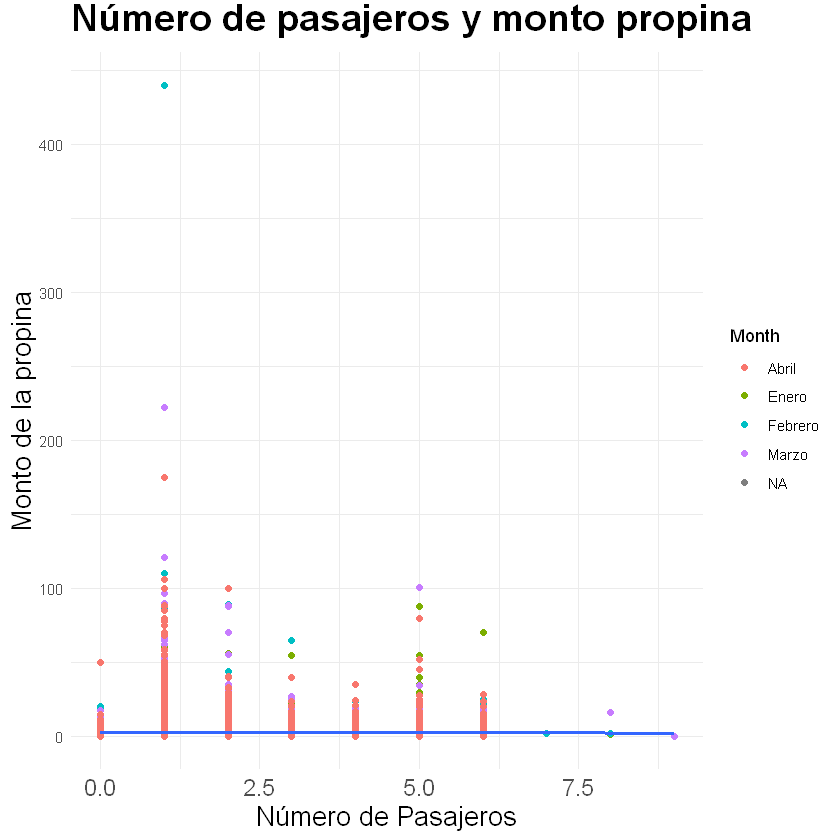

In [49]:
ggplot(data = primer_cuatrimestre) + 
    geom_point(aes(x = Passengers, y = Tip_amount, color = Month)) +
    geom_smooth(aes(x = Passengers, y = Tip_amount), se = FALSE) +
    theme_minimal() + labs(title ="Número de pasajeros y monto propina", 
                           x = "Número de Pasajeros", y = "Monto de la propina") + etiquetas +
    theme (plot.title = Titulo) 

Con esta gráfica, podemos ver que el número de pasajeros que se suben a los taxis verdes en Nueva York, no influye en el monto de la propina.

Y si viéramos la propina como porcentaje, ¿cambiaría algo?

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 703 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 703 rows containing missing values (geom_point)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


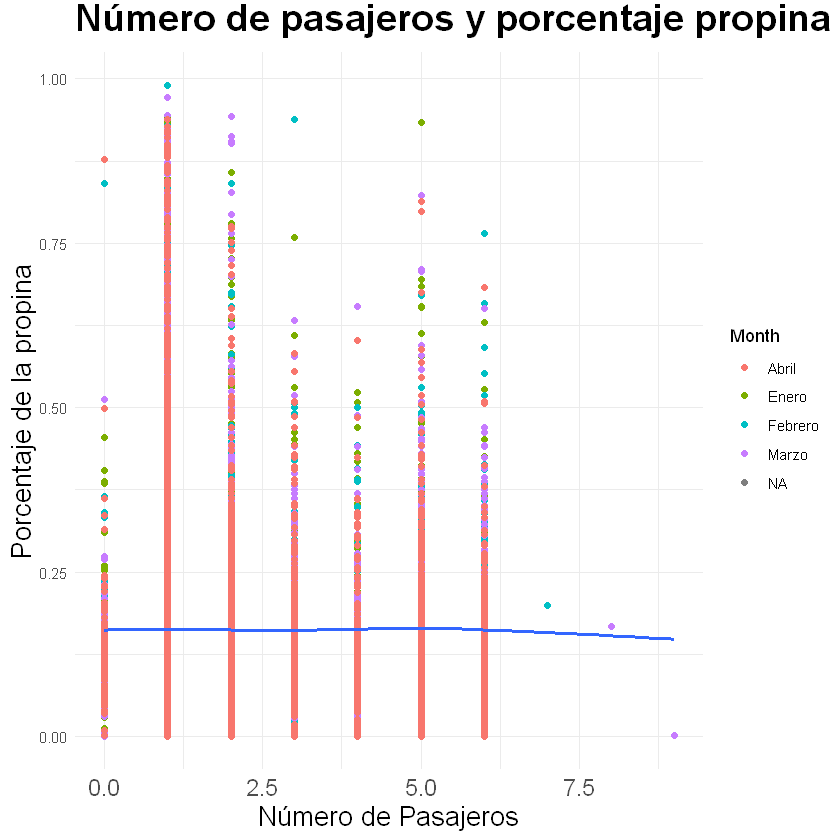

In [51]:
ggplot(data = primer_cuatrimestre) + 
    geom_point(aes(x = Passengers, y = Tip_pct, color = Month)) +
    geom_smooth(aes(x = Passengers, y = Tip_pct), se = FALSE) +
    theme_minimal() + labs(title ="Número de pasajeros y porcentaje propina", 
                           x = "Número de Pasajeros", y = "Porcentaje de la propina") + etiquetas +
    theme (plot.title = Titulo)

Vemos que la gráfica se ve mejor, sin embargo, el resultado es el mismo, el número de pasajeros no influye en el porcentaje de propina que se deja.

Ahora veremos qué tipo de relación existe entre la **distancia** y el **porcentaje de propina**.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 703 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 703 rows containing missing values (geom_point)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


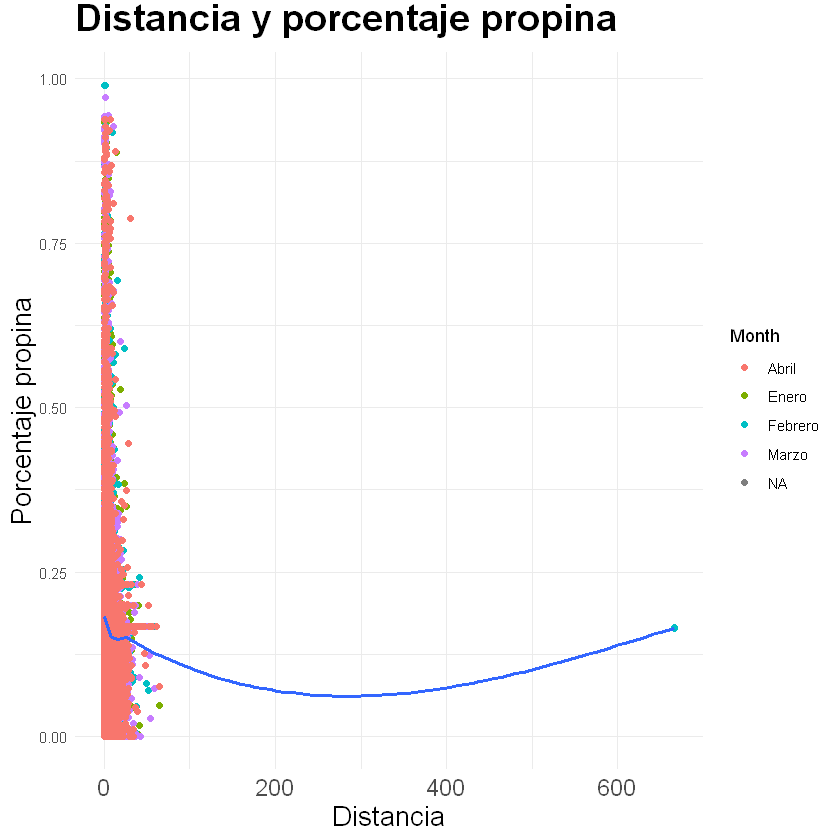

In [53]:
ggplot(data = primer_cuatrimestre) + 
    geom_point(aes(x = Trip_distance, y = Tip_pct, color = Month)) +
    geom_smooth(aes(x = Trip_distance, y = Tip_pct), se = FALSE) +
    theme_minimal() + labs(title ="Distancia y porcentaje propina", 
                           x = "Distancia", y = "Porcentaje propina") + etiquetas + 
    theme (plot.title = Titulo)

Con esta gráfica podemos ver que la distancia no es un factor que influye en el porcentaje de propina que se deja.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 703 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 703 rows containing missing values (geom_point)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


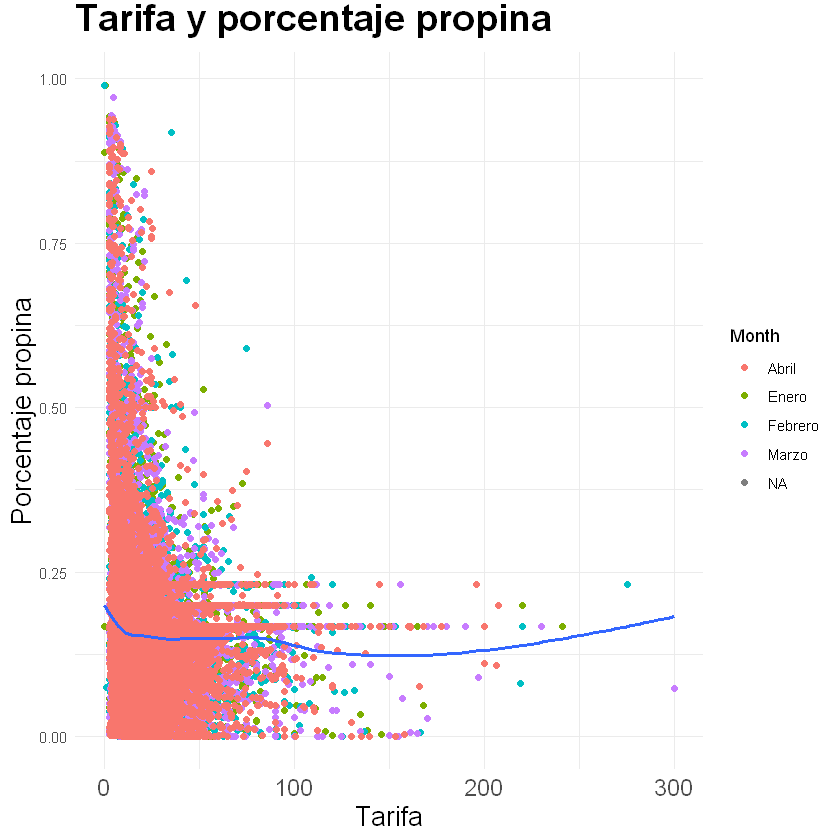

In [57]:
ggplot(data = primer_cuatrimestre) + 
    geom_point(aes(x = Fare_amount, y = Tip_pct, color = Month)) +
    geom_smooth(aes(x = Fare_amount, y = Tip_pct), se = FALSE) +
    theme_minimal() + labs(title ="Tarifa y porcentaje propina", 
                           x = "Tarifa", y = "Porcentaje propina") + etiquetas +
    theme (plot.title = Titulo) 

Con esta gráfica vemos lo mismo de gráficas anteriores, el porcentaje de propina que se deja no se ve afectado por la tarifa.

**Conclusión**: Con esta serie de gráficas, podríamos pensar que la propina al momento de usar un taxi verde en Nueva York, más que ser una decisión del pasajero, puede ser un porcentaje constante, una cuota fija que se le cobra al pasajero.

Al darnos cuenta que posiblemente la propina es un costo fijo para el pasajero, los análisis de regresión los haremos para la variable del **costo total del viaje**.

i.e. se considerará a las variables **pasajeros, distancia y tarifa** como variables explicativas ($x$) y **costo total** como la variable dependiente ($Y$).

Es así que ___'Costo total ~ Pasajeros + Distancia + Tarifa'___ es una **fórmula** que se lee como "la variable dependiente **costo total** está descrita/modelada/explicada por las variables **pasajeros, distancia y tarifa**".

In [60]:
head(primer_cuatrimestre, n=1)

X1,Pick_up,Dropp_off,Passengers,Trip_distance,Fare_amount,Tip_amount,Total_amount,Payment_type,Trip_type,Trip_duration,Tip_pct,Month
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
...1,2019-01-01 00:46:20,2019-01-01 01:04:54,2,2.68,13.5,2.96,19.71,1,1,0.3094444,0.1501776,Enero


Empezaremos viendo la relación de manera individual y posteriormente haremos el análisis agregando todas las variables explicativas.

- **Costo total ~ Pasajeros** 

Empecemos haciendo un *scatterplot* :

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 703 rows containing non-finite values (stat_smooth)."
Warning message:
"Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k."
Warning message:
"Removed 703 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 703 rows containing missing values (geom_point)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


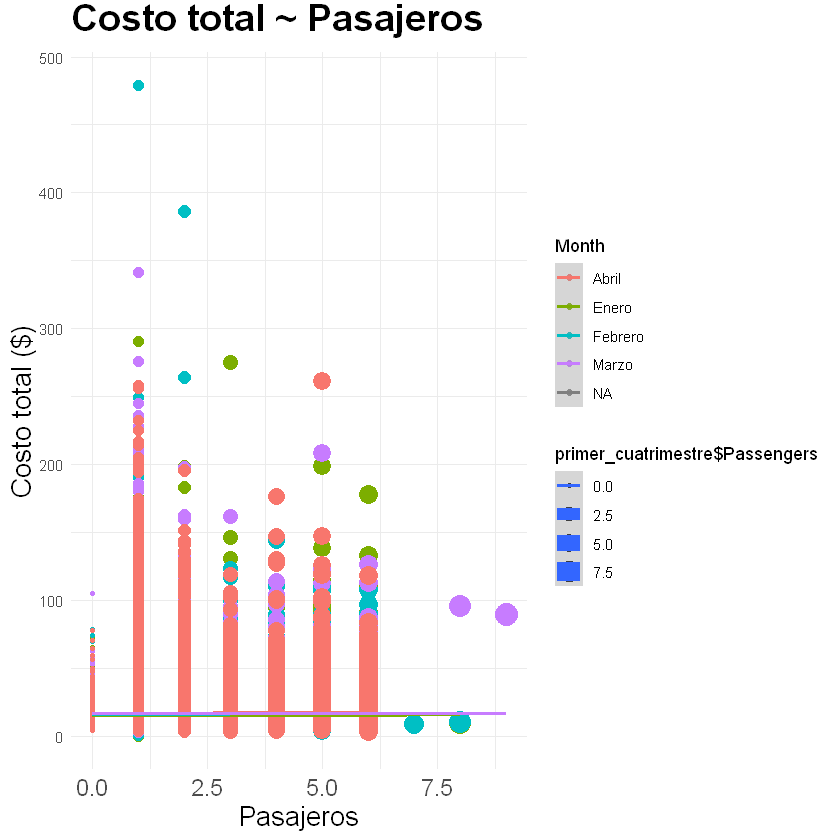

In [68]:
qplot(primer_cuatrimestre$Passengers, primer_cuatrimestre$Total_amount, data = primer_cuatrimestre, 
      geom = c("point", "smooth"), colour = Month, size = primer_cuatrimestre$Passengers)+
      theme_minimal() + labs(title ="Costo total ~ Pasajeros", 
                           x = "Pasajeros", y = "Costo total ($)") + etiquetas +
      theme (plot.title = Titulo) + 
      geom_smooth(formula = "y~x", method = lm, se = FALSE)

De esta gráfica podemos concluir que el número de pasajeros no explica el costo total del viaje.

Realizamos el ARLS con la función *[lm](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm)*:

In [71]:
costo_pasajeros_lm <- lm(primer_cuatrimestre$Total_amount ~ primer_cuatrimestre$Passengers, 
                         data = primer_cuatrimestre)

Los coeficientes que nos arroja el modelo son:

In [80]:
print(coef(costo_pasajeros_lm))

                   (Intercept) primer_cuatrimestre$Passengers 
                   16.32949435                     0.09699526 


La R cuadrada que nos arroja el modelo es de  8.098e-05, **es muy pequeña**. Esto hace sentido con la gráfica. Es un mal modelo.

In [81]:
summary(costo_pasajeros_lm)


Call:
lm(formula = primer_cuatrimestre$Total_amount ~ primer_cuatrimestre$Passengers, 
    data = primer_cuatrimestre)

Residuals:
   Min     1Q Median     3Q    Max 
-16.34  -7.07  -3.47   3.37 462.62 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    16.32949    0.02005 814.516  < 2e-16 ***
primer_cuatrimestre$Passengers  0.09700    0.01204   8.056 7.88e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.85 on 801369 degrees of freedom
  (703 observations deleted due to missingness)
Multiple R-squared:  8.098e-05,	Adjusted R-squared:  7.974e-05 
F-statistic:  64.9 on 1 and 801369 DF,  p-value: 7.881e-16


Los valores ajustados costo_total_hat son:

In [82]:
print(head(fitted(costo_pasajeros_lm)))

       1        2        3        4        5        6 
16.52348 16.42649 16.52348 16.42649 16.42649 16.42649 


Los residuales son:

In [84]:
print(head(residuals(costo_pasajeros_lm)))

        1         2         3         4         5         6 
 3.186515 20.633510 -7.163485 -2.426490  8.523510  9.133510 


- **Costo total ~ Distancia** 

Empecemos haciendo un *scatterplot* :

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 703 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 703 rows containing missing values (geom_point)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


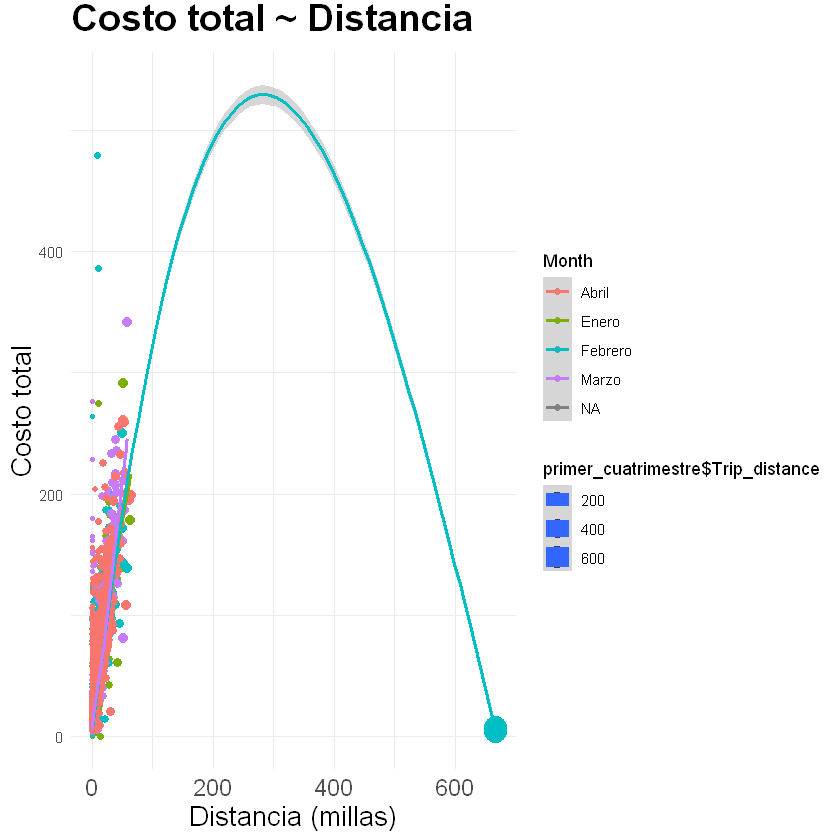

In [66]:
qplot(primer_cuatrimestre$Trip_distance, primer_cuatrimestre$Total_amount, data = primer_cuatrimestre, 
      geom = c("point", "smooth"), colour = Month, size = primer_cuatrimestre$Trip_distance)+
      theme_minimal() + labs(title ="Costo total ~ Distancia", 
                           x = "Distancia (millas)", y = "Costo total ($)") + etiquetas +
      theme (plot.title = Titulo) + 
      geom_smooth(formula = "y~x", method = lm, se = FALSE)

Con esta gráfica podemos ver que la distancia sí influye en el costo total del viaje, pues mientras más millas se viaje, mayor es el costo total del viaje. No vemos una relación lineal.

Realizamos el ARLS con la función *[lm](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm)*:

In [72]:
costo_distancia_lm <- lm(primer_cuatrimestre$Total_amount ~ primer_cuatrimestre$Trip_distance, 
                         data = primer_cuatrimestre)

Los coeficientes que nos arroja el modelo son:

In [75]:
print(coef(costo_distancia_lm))

                      (Intercept) primer_cuatrimestre$Trip_distance 
                         7.515711                          3.226281 


La R cuadrada que nos arroja el modelo es de 75.82% :

In [78]:
summary(costo_distancia_lm)


Call:
lm(formula = primer_cuatrimestre$Total_amount ~ primer_cuatrimestre$Trip_distance, 
    data = primer_cuatrimestre)

Residuals:
     Min       1Q   Median       3Q      Max 
-2154.20    -2.22    -0.97     1.20   441.21 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       7.515711   0.008208   915.6   <2e-16 ***
primer_cuatrimestre$Trip_distance 3.226281   0.002035  1585.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.338 on 801369 degrees of freedom
  (703 observations deleted due to missingness)
Multiple R-squared:  0.7582,	Adjusted R-squared:  0.7582 
F-statistic: 2.513e+06 on 1 and 801369 DF,  p-value: < 2.2e-16


Los valores ajustados costo_total_hat son:

In [79]:
print(head(fitted(costo_distancia_lm)))

       1        2        3        4        5        6 
16.16214 29.58348 11.22593 11.38725 25.26026 23.67938 


Los residuales son:

In [83]:
print(head(residuals(costo_distancia_lm)))

         1          2          3          4          5          6 
 3.5478551  7.4765246 -1.8659344  2.6127515 -0.3102584  1.8806195 


- **Costo total ~ Tarifa** 

Empecemos haciendo un *scatterplot* :

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 703 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 703 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 703 rows containing missing values (geom_point)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"


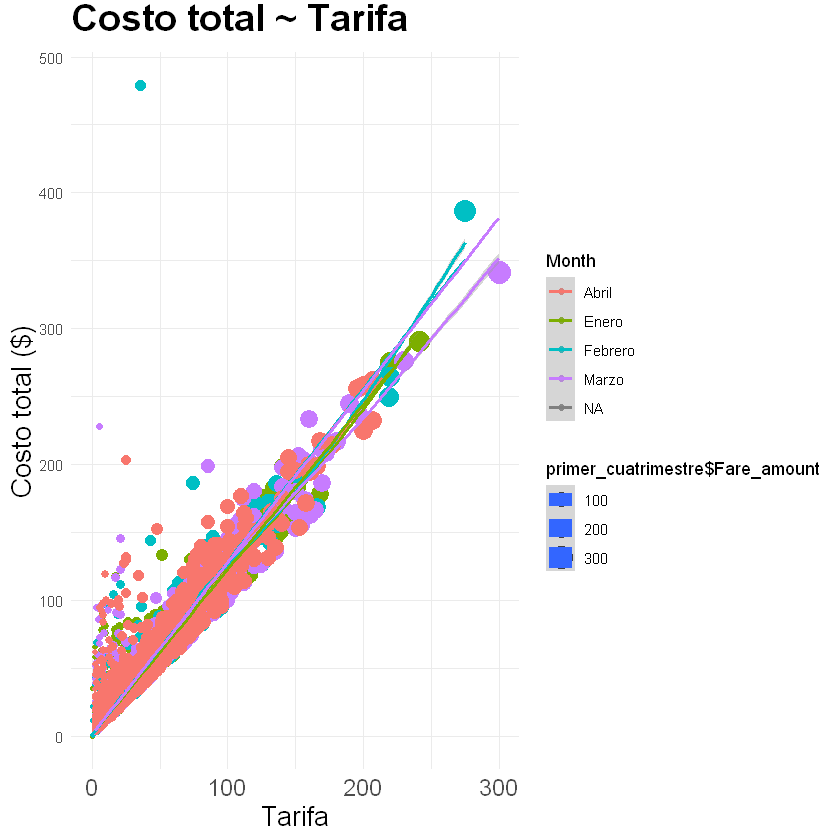

In [70]:
qplot(primer_cuatrimestre$Fare_amount, primer_cuatrimestre$Total_amount, data = primer_cuatrimestre, 
      geom = c("point", "smooth"), colour = Month, size = primer_cuatrimestre$Fare_amount)+
      theme_minimal() + labs(title ="Costo total ~ Tarifa", 
                           x = "Tarifa", y = "Costo total ($)") + etiquetas +
      theme (plot.title = Titulo) + 
      geom_smooth(formula = "y~x", method = lm, se = FALSE)

Con esta gráfica observamos una tendencia creciente entre la tarifa y el costo total del viaje, vemos que la relación parece ser lineal.

Realizamos el ARLS con la función *[lm](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm)*:

In [73]:
costo_tarifa_lm <- lm(primer_cuatrimestre$Total_amount ~ primer_cuatrimestre$Fare_amount, 
                         data = primer_cuatrimestre)

Los coeficientes que nos arroja el modelo son:

In [85]:
print(coef(costo_tarifa_lm))

                    (Intercept) primer_cuatrimestre$Fare_amount 
                       1.461736                        1.257216 


La R cuadrada que nos arroja el modelo es de 95.91%. Es una R **bastante grande**. Esto hace sentido con la gráfica y parece ser un buen modelo.

In [86]:
summary(costo_tarifa_lm)


Call:
lm(formula = primer_cuatrimestre$Total_amount ~ primer_cuatrimestre$Fare_amount, 
    data = primer_cuatrimestre)

Residuals:
   Min     1Q Median     3Q    Max 
-42.49  -0.96  -0.30   0.62 432.96 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.4617363  0.0042384   344.9   <2e-16 ***
primer_cuatrimestre$Fare_amount 1.2572158  0.0002899  4337.0   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.194 on 801369 degrees of freedom
  (703 observations deleted due to missingness)
Multiple R-squared:  0.9591,	Adjusted R-squared:  0.9591 
F-statistic: 1.881e+07 on 1 and 801369 DF,  p-value: < 2.2e-16


Los valores ajustados costo_total_hat son:

In [87]:
print(head(fitted(costo_tarifa_lm)))

        1         2         3         4         5         6 
18.434149 29.120483  9.633639 10.890855 25.977444 26.606052 


Los residuales son:

In [88]:
print(head(residuals(costo_tarifa_lm)))

         1          2          3          4          5          6 
 1.2758507  7.9395165 -0.2736389  3.1091454 -1.0274440 -1.0460519 


____________________________________________________________________________________________________________
#### ___SEGUNDO CUATRIMESTRE 2019___ 

____________________________________________________________________________________________________________
#### ___TERCER CUATRIMESTRE 2019___ 